In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# energygenerationdata = pd.read_csv("../data/time_series_60min_singleindex.csv",
#                         usecols=(lambda s: s.startswith('utc') | 
#                                  s.startswith('DE_solar') |
#                                  s. startswith('DE_wind')),
#                         parse_dates=[0], index_col=0)

windgenerationdata = pd.read_csv("../data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 s. startswith('DE_wind_generation')),
                        parse_dates=[0], index_col=0)

# solargenerationdata = pd.read_csv("../data/time_series_60min_singleindex.csv",
#                         usecols=(lambda s: s.startswith('utc') | 
#                                  s.startswith('DE_solar')),
#                         parse_dates=[0], index_col=0)

In [3]:
# weatherdata = pd.read_csv("../data/weather_data.csv",
#                 usecols=(lambda s: s.startswith('utc') | 
#                          s.startswith('DE')),
#                 parse_dates=[0], index_col=0)

In [4]:
windspeed = pd.read_csv("../data/weather_data.csv",
                usecols=(lambda s: s.startswith('utc') | 
                         s.startswith('DE_windspeed') |
                         s.startswith('DE_temperature')),
                parse_dates=[0], index_col=0)

In [5]:
windspeed

,DE_windspeed_10m,DE_temperature
utc_timestamp,,
1980-01-01 00:00:00,5.7291,-1.261
1980-01-01 01:00:00,5.7234,-1.414
1980-01-01 02:00:00,5.7342,-1.571
1980-01-01 03:00:00,5.7345,-1.760
1980-01-01 04:00:00,5.6416,-1.995
1980-01-01 05:00:00,5.6070,-2.190
1980-01-01 06:00:00,5.5772,-2.316
1980-01-01 07:00:00,5.3745,-2.439
1980-01-01 08:00:00,5.4239,-2.204


In [6]:
#creating training data but cutting the data based on time stamp
start_remove = pd.to_datetime('2016-01-01')
end_remove = pd.to_datetime('2017-01-01')
windspeedformatted = windspeed.loc[(windspeed.index >= start_remove)]
windgenerationdataformatted = windgenerationdata.loc[(windgenerationdata.index >= start_remove) & (windgenerationdata.index < end_remove)]

#creating test/comparison data
start_test = pd.to_datetime('2015-01-01')
end_test = pd.to_datetime('2016-01-01')
windspeedtest = windspeed.loc[(windspeed.index >= start_test) & (windspeed.index < end_test)]
windgenerationtest = windgenerationdata.loc[(windgenerationdata.index >= start_test) & (windgenerationdata.index < end_test)]

In [7]:
# windspeedformatted

In [8]:
# windgenerationdataformatted

In [9]:
# max(windgenerationdataformatted['DE_wind_generation_actual'])

In [10]:
# min(windgenerationdataformatted['DE_wind_generation_actual'])

In [11]:
windgenerationdataformatted = windgenerationdataformatted * 1e-3

In [12]:
windgenerationtest = windgenerationtest * 1e-3

In [13]:
# windgenerationtest

In [14]:
from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split

In [15]:
#train test might not be valid for our case because we have timestamps in play
# xtr, xts, ytr, yts = train_test_split(windspeedformatted,windgenerationdataformatted, test_size = 0.33)

In [16]:
#inital model training attempt
# model = LinearRegression().fit(xtr,ytr)
# predicted = model.predict(windspeedformatted)

In [17]:
#attempt at cross validation
# from sklearn.model_selection import cross_val_score

# model = LinearRegression()

# scores_wind = cross_val_score(model, windspeedformatted, windgenerationdataformatted, cv=5)
# print(scores_wind, "\naverage =", np.mean(scores_wind))

In [18]:
#predict using train test split data
# predicted = model.predict(xts)

In [19]:
# predicted

In [20]:
#error when using model from cross validation
# predicted = model.predict(windspeedformatted)

In [21]:
#timeseries used as x axis when plotting predicted
# timeseries = pd.date_range('2016-01-01', '2016-12-31 23:00:00', freq='H')

In [22]:
# timeseries

In [23]:
# windgenerationdataformatted.plot(linewidth=0.5)

In [24]:
# I think this is an invalid test because using entire dataset in the predict but the training data is from that same set
# plt.plot(timeseries,predicted, linewidth=0.5)

In [25]:
'''
Todo:
take in weather data and generation data
separate data into two sets:
Solar
X = [sun related weather columns] 
Y = wind_generation_actual
Wind:
X = [wind related weather columns] 
Y = sun_generation_actual

Trim data based on timestamp
Wind generation begins at 2010-01-01
However there are values with NaN. Chose to only take 2016 for now
No wind data past 2016

Solar generation begins at 2012-01-01

To try: if there are timestamps do I have to format data?
'''

'\nTodo:\ntake in weather data and generation data\nseparate data into two sets:\nSolar\nX = [sun related weather columns] \nY = wind_generation_actual\nWind:\nX = [wind related weather columns] \nY = sun_generation_actual\n\nTrim data based on timestamp\nWind generation begins at 2010-01-01\nHowever there are values with NaN. Chose to only take 2016 for now\nNo wind data past 2016\n\nSolar generation begins at 2012-01-01\n\nTo try: if there are timestamps do I have to format data?\n'

In [26]:
model = LinearRegression().fit(windspeedformatted,windgenerationdataformatted)

In [27]:
#using the previously formatted data which is data from 2015
prediction = model.predict(windspeedtest)

In [28]:
timeseries = pd.date_range('2015-01-01', '2015-12-31 23:00:00', freq='H')

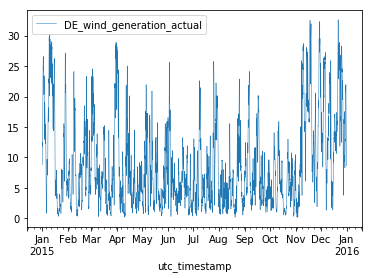

In [29]:
windgenerationtest.plot(linewidth=0.5)

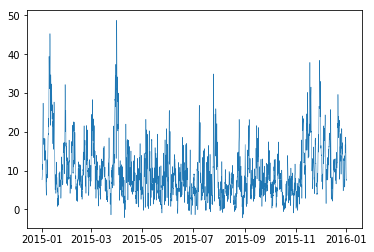

In [30]:
plt.plot(timeseries,prediction, linewidth=0.5)

In [31]:
from sklearn.metrics import r2_score
print(r2_score(windgenerationtest, prediction))

0.7534270049807754


In [32]:
#large number because we're deadling with large numbers
from sklearn.metrics import mean_squared_error
print(mean_squared_error(windgenerationtest, prediction))

12.632633831925965


In [33]:
print(np.sum((windgenerationtest-prediction)**2)/(prediction.shape[0]))

DE_wind_generation_actual    12.632634
dtype: float64


In [34]:
'''
To do:
Figure out mse (maybe normalize)
figure out cross validation fitting
Incorportate more data (more times and more regions)

NN model experimentation

Expand to solar generation
'''

'\nTo do:\nFigure out mse (maybe normalize)\nfigure out cross validation fitting\nIncorportate more data (more times and more regions)\n\nNN model experimentation\n\nExpand to solar generation\n'